DrakeML Project

In [4]:
import numpy as np
import pandas as pd
import os


# Set the path to your "data" folder
data_folder = 'data'

# List all files in the "data" folder and its subdirectories
for dirname, _, filenames in os.walk(data_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))


data\drake_data.csv
data\drake_lyrics.txt


In [5]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam



In [6]:
df = pd.read_csv("C:/Users/cioba/OneDrive/Desktop/DrakeML/data/drake_data.csv")
df.head()

,album,lyrics_title,lyrics_url,lyrics,track_views
0,Certified Lover Boy,Certified Lover Boy* Lyrics,https://genius.com/Drake-certified-lover-boy-l...,[Verse]\nPut my feelings on ice\nAlways been a...,8.7K
1,Certified Lover Boy,Like I’m Supposed To/Do Things Lyrics,https://genius.com/Drake-like-im-supposed-to-d...,[Verse]\nHands are tied\nSomeone's in my ear f...,38.8K
2,Certified Lover Boy,Not Around Lyrics,https://genius.com/Drake-not-around-lyrics,"[Intro]\nYeah, we back\nWassup ladies?\nSwisha...",129.8K
3,Certified Lover Boy,In the Cut (Ft. Roddy Ricch) Lyrics,https://genius.com/Drake-in-the-cut-lyrics,"[Intro: Drake]\nAyy, yeah\nPipe this shit up a...",72.1K
4,Certified Lover Boy,Zodiac Sign (Ft. Jessie Reyez) Lyrics,https://genius.com/Drake-zodiac-sign-lyrics,[Verse 1: Drake]\nYou ask how many girls I bee...,54.8K


In [7]:
col = ['lyrics']
df = df[col]
df

,lyrics
0,[Verse]\nPut my feelings on ice\nAlways been a...
1,[Verse]\nHands are tied\nSomeone's in my ear f...
2,"[Intro]\nYeah, we back\nWassup ladies?\nSwisha..."
3,"[Intro: Drake]\nAyy, yeah\nPipe this shit up a..."
4,[Verse 1: Drake]\nYou ask how many girls I bee...
...,...
285,Lyrics from cut studio recording\n\n[Verse 1: ...
286,Lyrics from Snippet\n\n[Chorus: Drake & Future...
287,"[Intro: Quavo]\nYeah, yeah\n(Deko)\nWoah, hold..."
288,"[Intro: Drake]\nThey wishing, they wishing, th..."


In [8]:
# How many reviews do we have?
print('There are', df.shape[0], 'data in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', df.isnull().sum().sum())

df.replace("", np.nan, inplace=True)
missing_values = df.isnull().sum()
print('Number of Missing Values and Empty Spaces by column:\n',missing_values)

There are 290 data in this dataset
Number of Duplicates: 13
Number of Missing Values by column:
 lyrics    2
dtype: int64
Number of Missing Values: 2
Number of Missing Values and Empty Spaces by column:
 lyrics    2
dtype: int64


In [9]:
# First, get all duplicate rows (keep=False ensures all duplicates are kept)
duplicate_rows = df[df.duplicated(keep=False)]

# Then sort the dataframe on all columns to ensure duplicates are adjacent
sorted_duplicates = duplicate_rows.sort_values(by=list(duplicate_rows.columns))

# Now, if we want to see 5 pairs of duplicates (10 rows), we can simply:
top_5_duplicate_pairs = sorted_duplicates.head(20)

top_5_duplicate_pairs

,lyrics
24,"[Intro: Drake & Sampha]\nIt's not me and you, ..."
146,"[Intro: Drake & Sampha]\nIt's not me and you, ..."
225,[Intro: Drake]\nI do this for ya'll man\nMalic...
258,[Intro: Drake]\nI do this for ya'll man\nMalic...
203,[Intro: Lil Wayne]\nYeah\nUh-huh\n\n[Verse 1: ...
188,[Intro: Lil Wayne]\nYeah\nUh-huh\n\n[Verse 1: ...
6,"[Intro: Pimp C]\nMan, get the fuck away from u..."
264,"[Intro: Pimp C]\nMan, get the fuck away from u..."
186,"[Intro: Trey Songz]\nThe money (Money), cars (..."
194,"[Intro: Trey Songz]\nThe money (Money), cars (..."


In [10]:
df = df.dropna()
print('Number of Missing Values:', df.isnull().sum().sum())

Number of Missing Values: 0


In [11]:
df = df.drop_duplicates()
print('Number of Duplicates:', len(df[df.duplicated()]))

Number of Duplicates: 0


In [12]:
lyrics_list = df['lyrics'].tolist()
lyrics_list[:3]

["[Verse]\nPut my feelings on ice\nAlways been a gem\nCertified lover boy, somehow still heartless\nHeart is only gettin' colder",
 "[Verse]\nHands are tied\nSomeone's in my ear from the other side\nTellin' me that I should pay you no mind\nWanted you to not be with me all night\nWanted you to not stay with me all night\nI know, you know, who that person is to me\nDoesn't really change things\n\n[Chorus]\nI know you're scared of dating, falling for me\nShorty, surely you know me\nRight here for you always\nYou know, I don't ever change\nRight here for you always\nYou know I don't ever change\nRight here for you\n\n[Bridge]\nIn mind you make me want to do things, love you\nLike I'm supposed to\nYou make me want to love you\nLike I'm supposed to\nYou make me want to love you\nLike I'm supposed to, remind you\nAyy\n\n[Chorus]\nI know you're scared of dating, falling for me\nShorty, by now you know me\nRight here for you always\nYou know, I don't ever change\nRight here for you always\nYou

In [13]:
import re

cleaned_lyrics_list = []
for song_lyrics in lyrics_list:
    # remove square brackets and their contents
    no_brackets = re.sub(r'\[.*?\]', '', song_lyrics)
    # replace slashes with spaces
    no_slashes = re.sub(r'/', ' ', no_brackets)
    # split the cleaned lyrics into separate lines
    lines = no_slashes.split('\n')
    # remove any remaining empty lines
    lines = [line for line in lines if line.strip() != '']
    cleaned_lyrics_list.extend(lines)

cleaned_lyrics_list[:3]

['Put my feelings on ice',
 'Always been a gem',
 'Certified lover boy, somehow still heartless']

In [14]:
cleaned_lyrics_list = cleaned_lyrics_list[:len(cleaned_lyrics_list)//4]

In [15]:
with open('lyrics.txt', 'w', encoding='utf-8') as file:
    for line in cleaned_lyrics_list:
        file.write(str(line) + '\n')


In [16]:
# Load the dataset with UTF-8 encoding
data = open('C:/Users/cioba/OneDrive/Desktop/DrakeML/lyrics.txt', encoding='utf-8').read()

# Lowercase and split the text
corpus = data.lower().split("\n")

# Preview the result
print(corpus[:3])


['put my feelings on ice', 'always been a gem', 'certified lover boy, somehow still heartless']


In [17]:
# Initialize the Tokenizer class
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(corpus)

# Define the total words. You add 1 for the index `0` which is just the padding token.
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary: {'i': 1, 'you': 2, 'the': 3, 'to': 4, 'me': 5, 'and': 6, 'a': 7, 'it': 8, 'my': 9, 'that': 10, "i'm": 11, 'in': 12, 'on': 13, 'yeah': 14, 'for': 15, 'know': 16, 'like': 17, 'they': 18, 'is': 19, 'of': 20, 'up': 21, 'all': 22, 'with': 23, 'got': 24, 'just': 25, 'this': 26, "it's": 27, "don't": 28, 'we': 29, 'your': 30, 'but': 31, 'shit': 32, 'when': 33, 'get': 34, 'no': 35, 'be': 36, 'oh': 37, 'now': 38, 'ayy': 39, 'niggas': 40, 'out': 41, 'baby': 42, 'what': 43, 'do': 44, 'back': 45, 'love': 46, 'she': 47, 'was': 48, 'gotta': 49, 'man': 50, 'at': 51, 'from': 52, 'not': 53, 'say': 54, 'so': 55, 'never': 56, "'cause": 57, "that's": 58, 'one': 59, 'time': 60, 'how': 61, 'too': 62, 'fuck': 63, 'right': 64, 'where': 65, 'had': 66, 'make': 67, 'if': 68, 'down': 69, "ain't": 70, 'way': 71, 'nigga': 72, 'can': 73, 'then': 74, "can't": 75, 'go': 76, 'tell': 77, 'ooh': 78, 'been': 79, 'wanna': 80, 'need': 81, 'still': 82, 'some': 83, 'more': 84, 'these': 85, 'even': 86, 'c

In [18]:
# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in corpus:

	# Tokenize the current line
	token_list = tokenizer.texts_to_sequences([line])[0]

	# Loop over the line several times to generate the subphrases
	for i in range(1, len(token_list)):

		# Generate the subphrase
		n_gram_sequence = token_list[:i+1]

		# Append the subphrase to the sequences list
		input_sequences.append(n_gram_sequence)

# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [19]:
xs, ys

(array([[  0,   0,   0, ...,   0,   0, 123],
        [  0,   0,   0, ...,   0, 123,   9],
        [  0,   0,   0, ..., 123,   9, 602],
        ...,
        [  0,   0,   0, ...,   2,  41, 112],
        [  0,   0,   0, ...,  41, 112, 957],
        [  0,   0,   0, ..., 112, 957, 474]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(xs, ys, test_size=0.2, random_state=42)


In [21]:
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence:
  token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)

sample sentence: ['put', 'my', 'feelings', 'on', 'ice']
[123, 9, 602, 13, 351]


In [22]:
# Pick element
elem_number = 5

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 103  79]
decoded to text: ['always been']
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 7


In [23]:
# Pick element
elem_number = 4

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 103]
decoded to text: ['always']
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 79


In [24]:
# Hyperparameters
embedding_dim = 100
lstm_units = 150
learning_rate = 0.01

# Build the model
model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
          Bidirectional(LSTM(lstm_units)),
          Dense(total_words, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
    )

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 100)          403400    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 4034)              1214234   
                                                                 
Total params: 1,918,834
Trainable params: 1,918,834
Non-trainable params: 0
_________________________________________________________________


In [25]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Train the model
import json
from tensorflow.keras.callbacks import ModelCheckpoint

def train_model(model, X_train, Y_train, X_test, Y_test, epochs=15, model_path="drake_lyrics_model.h5", history_path="training_history.json"):
    """
    Trains the model and saves the best version along with training history.

    Parameters:
        model: Keras model to train
        X_train, Y_train: Training data
        X_test, Y_test: Validation data
        epochs: Number of epochs (default: 50)
        model_path: Path to save the trained model (default: "drake_lyrics_model.h5")
        history_path: Path to save training history (default: "training_history.json")

    Returns:
        history: Training history object
    """
    # Save only the best model based on validation loss
    checkpoint = ModelCheckpoint(model_path, save_best_only=True, monitor="val_loss", mode="min")

    # Train the model
    history = model.fit(X_train, Y_train,
                        epochs=epochs,
                        validation_data=(X_test, Y_test),
                        callbacks=[checkpoint])

    # Save training history as JSON
    history_dict = history.history
    with open(history_path, "w") as f:
        json.dump(history_dict, f)

    print(f"\n✅ Model saved to: {model_path}")
    print(f"📊 Training history saved to: {history_path}")

    return history


In [26]:
history = train_model(model, X_train, Y_train, X_test, Y_test, epochs=15)


Epoch 1/15
766/766 [==============================] - 153s 197ms/step - loss: 6.1738 - accuracy: 0.0737 - val_loss: 5.7219 - val_accuracy: 0.1205
Epoch 2/15
766/766 [==============================] - 161s 210ms/step - loss: 5.0394 - accuracy: 0.1584 - val_loss: 5.5369 - val_accuracy: 0.1706
Epoch 3/15
766/766 [==============================] - 171s 224ms/step - loss: 4.2097 - accuracy: 0.2257 - val_loss: 5.6057 - val_accuracy: 0.1952
Epoch 4/15
766/766 [==============================] - 172s 225ms/step - loss: 3.5299 - accuracy: 0.2894 - val_loss: 5.8272 - val_accuracy: 0.2148
Epoch 5/15
766/766 [==============================] - 172s 224ms/step - loss: 3.0109 - accuracy: 0.3537 - val_loss: 6.0050 - val_accuracy: 0.2275
Epoch 6/15
766/766 [==============================] - 172s 224ms/step - loss: 2.6155 - accuracy: 0.4103 - val_loss: 6.2613 - val_accuracy: 0.2375
Epoch 7/15
766/766 [==============================] - 171s 224ms/step - loss: 2.3517 - accuracy: 0.4556 - val_loss: 6.4995 -

In [27]:
from tensorflow.keras.models import load_model

# Load the saved model
my_model = load_model("drake_lyrics_model.h5")


In [28]:


import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')


'\n\nimport matplotlib.pyplot as plt\n\n# Plot utility\ndef plot_graphs(history, string):\n  plt.plot(history.history[string])\n  plt.xlabel("Epochs")\n  plt.ylabel(string)\n  plt.show()\n\n# Visualize the accuracy\nplot_graphs(history, \'accuracy\')\n'

Profanity Handler

In [29]:
from better_profanity import profanity


def censor_word(word):
    return profanity.censor(word)  # Replaces curse words with '*'

Generation of lyrics

In [30]:
import numpy as np

def generate_lyrics(seed_text, next_words=100, temperature=0.8, repetition_threshold=3):
    word_counts = {}  # Track word occurrences

    for _ in range(next_words):
        # Convert seed text to token sequence
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')

        # Get model predictions
        probabilities = model.predict(token_list, verbose=0)[0]

        # Apply temperature scaling for diversity
        probabilities = np.log(probabilities + 1e-10) / temperature  # Avoid log(0)
        probabilities = np.exp(probabilities) / np.sum(np.exp(probabilities))  # Softmax

        # Pick the next word index based on adjusted probabilities
        predicted_index = np.random.choice(len(probabilities), p=probabilities)

        if predicted_index == 0:
            continue  # Skip padding

        # Convert index to word
        output_word = tokenizer.index_word.get(predicted_index, "")

        # Check if word is repeating too much
        word_counts[output_word] = word_counts.get(output_word, 0) + 1
        if word_counts[output_word] > repetition_threshold:
            continue  # Skip word if it's repeated too much
        output_word = profanity.censor(output_word)
        # Append to seed text
        seed_text += " " + output_word

    return seed_text


seed_text = generate_lyrics("sunshine this morning", next_words=100, temperature=0.8)
# Test lyric generation
print(seed_text)


sunshine this morning here speak on some coach is i'm i'm i'm bridgin' the entrance and and never that's doin' a man a **** suitcase off my racks in the snow for you and call me coming live life like he still on you al– **** **** so i could hold for your headtop what is drop on the hands or whoa yeah yeah yeah


Evaluation


Vader evaluation


In [31]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [32]:
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    scores = analyzer.polarity_scores(text)  # Get sentiment scores
    return scores  # Returns dictionary with positive, negative, neutral, and compound score

# Test
print(vader_sentiment(seed_text))


{'neg': 0.029, 'neu': 0.804, 'pos': 0.168, 'compound': 0.8481}


In [33]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cioba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [34]:
def analyze_lyrics_sentiment(lyrics):
    sentiment_scores = sia.polarity_scores(lyrics)

    # Extract individual scores
    compound = sentiment_scores['compound']  # Overall sentiment score
    pos = sentiment_scores['pos']  # Positive percentage
    neu = sentiment_scores['neu']  # Neutral percentage
    neg = sentiment_scores['neg']  # Negative percentage

    # Determine overall sentiment label
    if compound >= 0.05:
        sentiment_label = "Positive 😊"
    elif compound <= -0.05:
        sentiment_label = "Negative 😢"
    else:
        sentiment_label = "Neutral 😐"

    # Print results
    print("\n🎵 Sentiment Analysis of Generated Lyrics 🎵\n")
    print(f"Overall Sentiment: {sentiment_label}")
    print(f"Positive: {pos*100:.2f}% | Neutral: {neu*100:.2f}% | Negative: {neg*100:.2f}%\n")

    return sentiment_scores


In [35]:
analyze_lyrics_sentiment(seed_text)


🎵 Sentiment Analysis of Generated Lyrics 🎵

Overall Sentiment: Positive 😊
Positive: 17.50% | Neutral: 79.50% | Negative: 3.00%



{'neg': 0.03, 'neu': 0.795, 'pos': 0.175, 'compound': 0.8481}

In [36]:
def categorize_lyrics(lyrics):
    sentiment_scores = sia.polarity_scores(lyrics)
    compound = sentiment_scores['compound']

    if compound >= 0.3:
        return "🎶 Happy Vibes!"
    elif compound <= -0.3:
        return "💔 Sad & Emotional"
    else:
        return "😐 Chill & Neutral"

# Example Usage
print("Mood of the song:", categorize_lyrics(seed_text))


Mood of the song: 🎶 Happy Vibes!


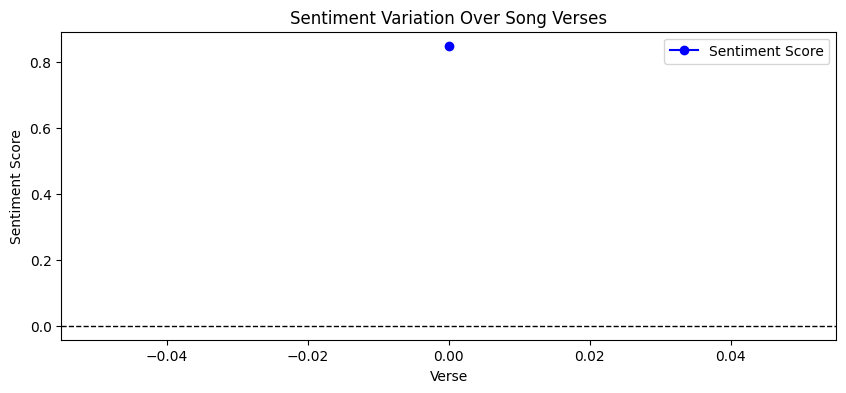

In [37]:
import matplotlib.pyplot as plt

def plot_sentiment_over_verses(lyrics):
    verses = lyrics.split("\n")  # Split lyrics into lines
    sentiments = [sia.polarity_scores(verse)["compound"] for verse in verses if verse.strip()]

    plt.figure(figsize=(10, 4))
    plt.plot(sentiments, marker='o', linestyle='-', color='b', label="Sentiment Score")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.xlabel("Verse")
    plt.ylabel("Sentiment Score")
    plt.title("Sentiment Variation Over Song Verses")
    plt.legend()
    plt.show()

# Example Usage
plot_sentiment_over_verses(seed_text)


In [38]:
from language_tool_python import LanguageTool

tool = LanguageTool("en-US")

def check_grammar(text):
    matches = tool.check(text)
    return matches if matches else "No major grammar issues"

# Test
print(check_grammar(seed_text))


[Match({'ruleId': 'UPPERCASE_SENTENCE_START', 'message': 'This sentence does not start with an uppercase letter.', 'replacements': ['Sunshine'], 'offsetInContext': 0, 'context': 'sunshine this morning here speak on some coach i...', 'offset': 0, 'errorLength': 8, 'category': 'CASING', 'ruleIssueType': 'typographical', 'sentence': "sunshine this morning here speak on some coach is i'm i'm i'm bridgin' the entrance and and never that's doin' a man a **** suitcase off my racks in the snow for you and call me coming live life like he still on you al– **** **** so i could hold for your headtop what is drop on the hands or whoa yeah yeah yeah"}), Match({'ruleId': 'I_LOWERCASE', 'message': 'The personal pronoun “I” should be uppercase.', 'replacements': ['I'], 'offsetInContext': 43, 'context': "...his morning here speak on some coach is i'm i'm i'm bridgin' the entrance and and...", 'offset': 50, 'errorLength': 1, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': "sunshine this

In [39]:
def detect_repetitions(text):
    words = text.split()
    repeated = {word for word in words if words.count(word) > 3}
    return repeated if repeated else "No excessive repetitions"

# Test
print(detect_repetitions(seed_text))


No excessive repetitions


In [40]:
import re

def check_theme_relevance(text, keywords=None):
    if keywords is None:
        keywords = ["Toronto", "6", "Bentley", "gold", "luxury", "money", "OVO", "Rolls", "chains", "VIP"]

    # Convert text to lowercase for case-insensitive matching
    text_lower = text.lower()

    # Use regex to find exact word matches
    matches = [word for word in keywords if re.search(rf'\b{re.escape(word.lower())}\b', text_lower)]

    if matches:
        return {"relevant_words": matches, "relevance_score": len(matches) / len(keywords)}
    return {"relevant_words": [], "relevance_score": 0.0}

# Test
print(check_theme_relevance(seed_text))


{'relevant_words': [], 'relevance_score': 0.0}


In [41]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


192/192 [==============================] - 5s 26ms/step - loss: 7.7897 - accuracy: 0.2509
Test Loss: 7.7897
Test Accuracy: 0.2509


In [42]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import torch

print(torch.cuda.device_count())

0


Training Accuracy: 0.9986
Validation Accuracy: 0.8467
⚠️ Possible Overfitting Detected: Large gap between training and validation accuracy!


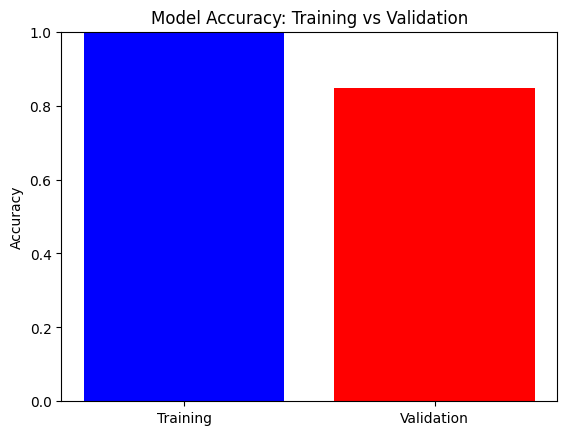

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree model
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Compute training and validation accuracy
train_acc = accuracy_score(y_train, model.predict(X_train))
val_acc = accuracy_score(y_val, model.predict(X_val))

# Detect overfitting: Large gap between train and val accuracy
overfitting = train_acc - val_acc > 0.15  # Overfitting threshold

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

if overfitting:
    print("⚠️ Possible Overfitting Detected: Large gap between training and validation accuracy!")
else:
    print("✅ No significant overfitting detected.")

# Plot train vs validation accuracy
plt.bar(["Training", "Validation"], [train_acc, val_acc], color=["blue", "red"])
plt.ylim(0, 1)
plt.title("Model Accuracy: Training vs Validation")
plt.ylabel("Accuracy")
plt.show()
